# Hierarchical Clustering


# Agglomerative Hierarchical Clustering
We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>


In [11]:
import numpy as np
import pandas as pd 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt 
from sklearn import manifold , datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline 


# Generating Random Data
We will be generating a set of data using the <b>make_blobs</b> class. <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.


In [12]:
x1 ,y1 = make_blobs(n_samples=50 , centers=[[4,4], [-2, -1], [1, 1], [10,4]] , cluster_std= 0.9 )


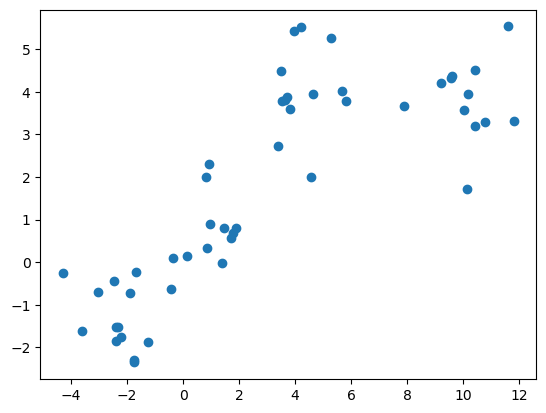

In [13]:
# Plot the scatter plot of the randomly generated data.
plt.scatter(x1[:,0] , x1[:,1],marker='o')
plt.show()


# Agglomerative Clustering

We will start by clustering the random data points we just created.


The <b> Agglomerative Clustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>.


In [14]:
agglom = AgglomerativeClustering(n_clusters=4,linkage='average') # data will be grouped into 4 clusters).,average distance between all pairs

In [15]:
# Fit the model with X2 and y2 from the generated data above.
agglom.fit(x1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

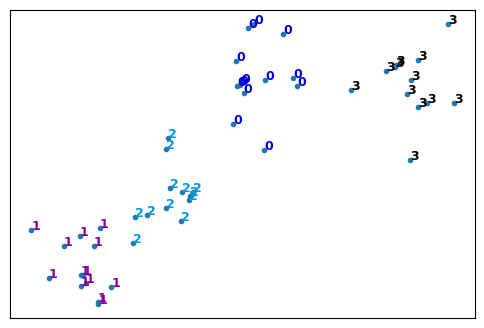

In [16]:
#Run the following code to show the clustering!
#Remember to read the code and comments to gain more understanding on how the plotting works.

plt.figure(figsize=(6,4))

# Create a minimum and maximum range of X1.
x_min , x_max = np.min(x1,axis = 0) , np.max(x1,axis = 0)# axis=0 operates along columns (vertical direction). , axis=1 operates along rows (horizontal direction).

# Get the average distance for X1.
x1 = (x1 - x_min / x_max - x_min)

# # This loop displays all of the datapoints., places text on the plot at the position defined by the data point coordinates, 
for i in range (x1.shape[0]):
    plt.text(x1[i,0],x1[i,1],str(y1[i]), # X1[i, 0] (x-coordinate) and X1[i, 1] (y-coordinate). ,str(y1[i])) shows the cluster ID, and its color is determined by the cluster it belongs to.
    color = plt.cm.nipy_spectral(agglom.labels_[i]/10.),#plt.cm.nipy_spectral() spectral colormap that colors the data points according to their cluster label, creating a gradient effect from one cluster to another.agglom.labels_[i] is the cluster label assigned to the i-th data point by the Agglomerative Clustering model.
    fontdict = {'weight': 'bold', 'size': 9}) # This dictionary defines the font properties for the text. 'weight': 'bold' makes the label text bold.'size': 9 sets the font size to 9.

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

#plt.axis('off')
plt.scatter(x1[:,0],x1[:,1],marker='.')

plt.show()



<h3 id="dendrogram">Dendrogram Associated for the Agglomerative Hierarchical Clustering</h3>

Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. 

Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X1 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)


In [18]:
dist_matrix = distance_matrix(x1,x1)
print(dist_matrix)

[[0.         9.18956219 0.82025619 ... 3.86287734 3.89993964 3.03326218]
 [9.18956219 0.         8.48394205 ... 6.9100596  6.60144482 6.80440353]
 [0.82025619 8.48394205 0.         ... 3.70247627 3.67013588 2.73409984]
 ...
 [3.86287734 6.9100596  3.70247627 ... 0.         0.32953326 1.07625086]
 [3.89993964 6.60144482 3.67013588 ... 0.32953326 0.         0.95435279]
 [3.03326218 6.80440353 2.73409984 ... 1.07625086 0.95435279 0.        ]]


Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>.


In [20]:
z = hierarchy.linkage(dist_matrix,'complete') # complete linkage method and returns a linkage matrix

C:\Users\admin\AppData\Local\Temp\ipykernel_8652\848115291.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_matrix,'complete')


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>


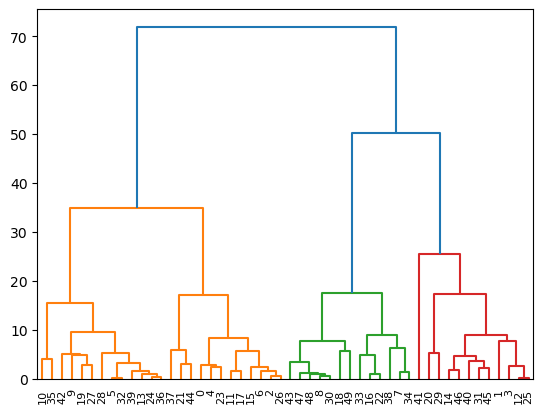

In [21]:
dendro = hierarchy.dendrogram(z)